In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [172]:
data  = pd.read_csv(r"C:\Users\91863\Downloads\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [173]:
data.shape

(400, 11)

In [174]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [176]:
data = pd.get_dummies(data,columns =["Urban","US"])

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_No     400 non-null    uint8  
 10  Urban_Yes    400 non-null    uint8  
 11  US_No        400 non-null    uint8  
 12  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(4)
memory usage: 29.8+ KB


In [178]:

data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [179]:
data = data.reindex(columns =["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education","Urban_No","Urban_Yes","US_No","US_Yes","ShelveLoc"])

In [180]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc
0,9.50,138,73,11,276,120,42,17,0,1,0,1,3
1,11.22,111,48,16,260,83,65,10,0,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,0,1,2
3,7.40,117,100,4,466,97,55,14,0,1,0,1,2
4,4.15,141,64,3,340,128,38,13,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1,1
396,6.14,139,23,3,37,120,55,11,1,0,0,1,2
397,7.41,162,26,12,368,159,40,18,0,1,0,1,2
398,5.94,100,79,7,284,95,50,12,0,1,0,1,3


In [181]:
x = data.iloc[:,0:12]
y = data.iloc[:,12]

In [182]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,1,0,1
4,4.15,141,64,3,340,128,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1
396,6.14,139,23,3,37,120,55,11,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1


In [183]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [184]:
data["ShelveLoc"].unique()

array([3, 1, 2], dtype=int64)

In [185]:
data["ShelveLoc"].value_counts()


2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [186]:
colnames = list(data.columns)

In [187]:
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes',
 'ShelveLoc']

In [188]:
# splitting data into training a nd testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [189]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth =3)    # C5.0
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [67, 170, 83]'),
 Text(0.25, 0.625, 'x[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [0, 53, 55]'),
 Text(0.125, 0.375, 'x[2] <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(0.375, 0.375, 'x[2] <= 26.5\nentropy = 0.987\nsamples = 90\nvalue = [0, 51, 39]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(0.75, 0.625, 'x[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [67, 117, 28]'),
 Text(0.625, 0.375, 'x[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [31, 104, 25]'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 33\nvalue = [1, 18, 14]'),
 Text(0.6875, 0.125, 'entropy = 1.178\nsamples = 127\nvalue = [30, 86, 11]'),
 Text(0.875, 

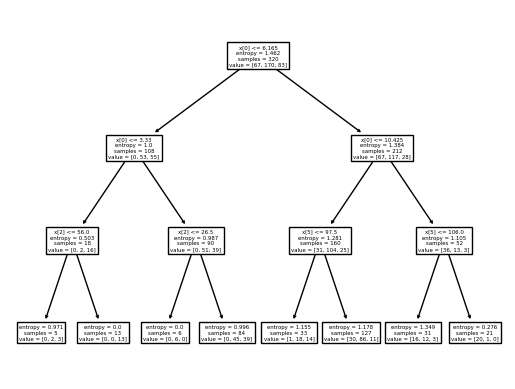

In [190]:
# plot the decision treee
tree.plot_tree(model)

[Text(0.5, 0.875, 'Sales <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [67, 170, 83]\nclass = 2'),
 Text(0.25, 0.625, 'Sales <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [0, 53, 55]\nclass = 3'),
 Text(0.125, 0.375, 'Income <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]\nclass = 3'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]\nclass = 3'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13]\nclass = 3'),
 Text(0.375, 0.375, 'Income <= 26.5\nentropy = 0.987\nsamples = 90\nvalue = [0, 51, 39]\nclass = 2'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = 2'),
 Text(0.4375, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]\nclass = 2'),
 Text(0.75, 0.625, 'Sales <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [67, 117, 28]\nclass = 2'),
 Text(0.625, 0.375, 'Price <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [31, 104, 25]\nclass = 2'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 

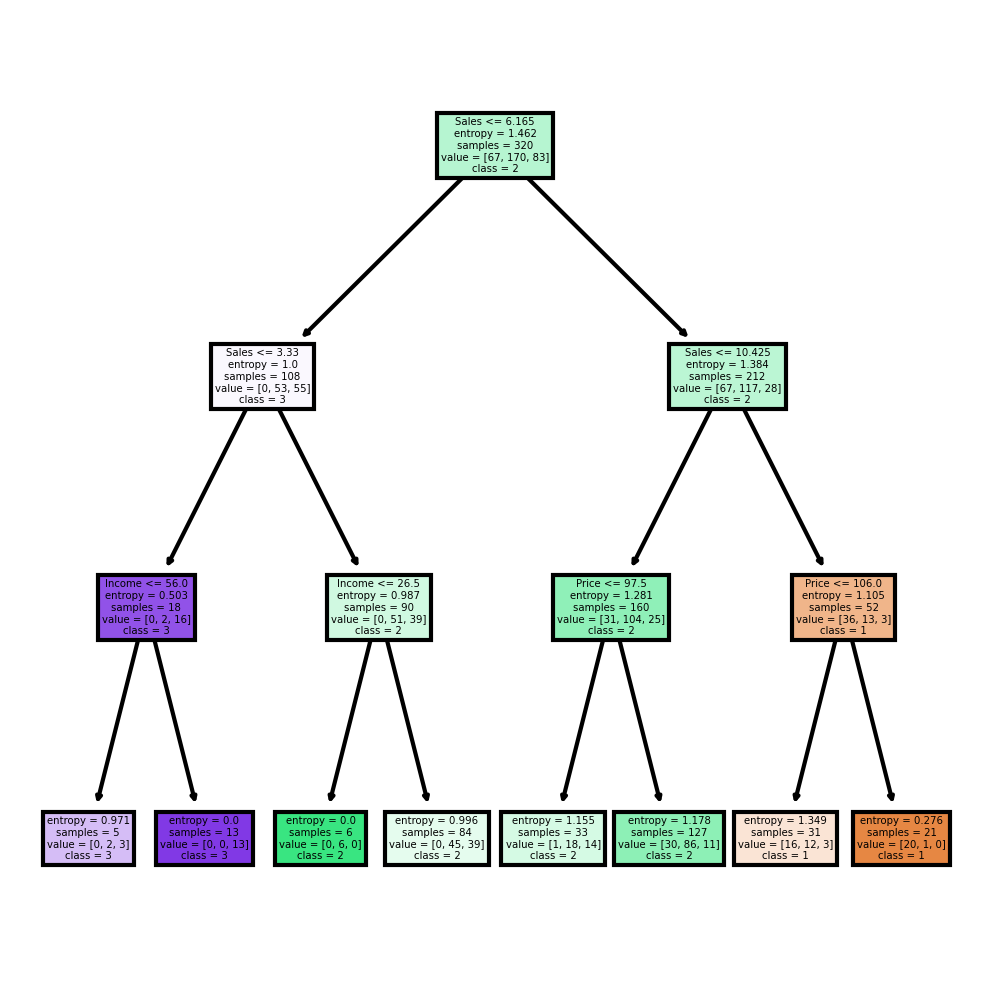

In [191]:
fn = ["Sales",'CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn =  ["1","2","3"]
fig,axes = plt.subplots(nrows=1,ncols= 1,figsize=(4,4),dpi = 300)
tree.plot_tree(model,feature_names =fn,class_names = cn,filled = True)

In [192]:
# prediction on test data
                            # entropy  = 0 ----pure region

preds = model.predict(x_test)

pd.Series(preds).value_counts()  # getting count of each category


2    63
1    13
3     4
dtype: int64

In [193]:
pd.crosstab(y_test,preds)  # table for correct and wrong prediction

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [194]:
# accuracy
np.mean(preds == y_test)


0.625

# building decision tree classifier (CART ) using Gini Criteria

In [195]:
from sklearn.tree import DecisionTreeClassifier
model_gini= DecisionTreeClassifier(criterion = "gini",max_depth =3)

In [196]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [197]:
# prediction ans computing accuracy

preds = model.predict(x_test)
np.mean(preds == y_test)

0.625

# decision tree regression example

In [198]:
#decision tree regression


from sklearn.tree import DecisionTreeRegressor

In [199]:
array=data.values
x=array[:,0:12]
y = array[:,12]

In [200]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [201]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [202]:
# finding the accuracy
model.score(x_test,y_test)

-0.27087576374745415

In [203]:
metrics.accuracy_score(y_test,preds)

0.625